In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal
import graphviz



In [2]:
df = pd.read_csv('Project_Dataset/Application_Data.csv')
# ['NAME_CONTRACT_STATUS']=df['NAME_CONTRACT_STATUS'].astype(int)
df.head()

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11,12,13,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_SELLER_INDUSTRY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,NAME_CONTRACT_STATUS,AMT_CREDIT
0,Consumer loans,179055.0,0.0,179055.0,SATURDAY,9,NaN,New,Vehicles,Auto technology,...,Single / not married,House / apartment,-9461.0,-637.0,NaN,1.0,0.0,1.0,Approved,179055.0
1,Cash loans,900000.0,NaN,900000.0,FRIDAY,12,Unaccompanied,Repeater,XNA,XNA,...,Married,House / apartment,-16765.0,-1188.0,NaN,1.0,0.0,2.0,Approved,1035882.0
2,Consumer loans,24282.0,4860.0,24282.0,FRIDAY,5,Unaccompanied,New,Mobile,Connectivity,...,Single / not married,House / apartment,-19046.0,-225.0,26.0,1.0,0.0,1.0,Approved,20106.0
3,Revolving loans,270000.0,NaN,270000.0,THURSDAY,15,Unaccompanied,Repeater,XNA,XNA,...,Civil marriage,House / apartment,-19005.0,-3039.0,NaN,1.0,0.0,2.0,Approved,270000.0
4,Cash loans,247500.0,NaN,247500.0,MONDAY,11,NaN,Repeater,XNA,XNA,...,Single / not married,House / apartment,-19932.0,-3038.0,NaN,1.0,0.0,1.0,Approved,274288.5


In [3]:
# check the shape of the dataset
df.shape

(305828, 28)

In [4]:
# check for null
df.isnull().sum()

NAME_CONTRACT_TYPE                 0
AMT_APPLICATION                    0
AMT_DOWN_PAYMENT              126683
AMT_GOODS_PRICE                50611
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
NAME_TYPE_SUITE               145006
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                    47690
CODE_GENDER                    43497
FLAG_OWN_CAR                   43497
FLAG_OWN_REALTY                43497
CNT_CHILDREN                   43497
AMT_INCOME_TOTAL               43497
NAME_INCOME_TYPE               43497
NAME_EDUCATION_TYPE            43497
NAME_FAMILY_STATUS             43497
NAME_HOUSING_TYPE              43497
DAYS_BIRTH                     43497
DAYS_EMPLOYED                  43497
OWN_CAR_AGE                   216828
FLAG_MOBIL                     43497
FLAG_EMAIL                     43497
CNT_FAM_MEMBERS                43497
NAME_CONTRACT_STATUS               0
A

In [5]:
# check how many duplicated row in the dataset
df.duplicated().sum()

7153

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


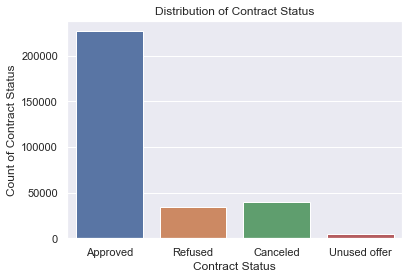

In [6]:
# Use matplotlib to virually shows that the differece between all types of application result
import matplotlib
sns.countplot(df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [7]:
# drop the cancled loan application cuz it does not make any contribution to our reseach topic
# and mark Approved and Unused offers as approved since they got accepted
# and mark Refused loan as 0
# df['NAME_CONTRACT_STATUS']=df['NAME_CONTRACT_STATUS'].replace('Approved', '1')
# df['NAME_CONTRACT_STATUS']=df['NAME_CONTRACT_STATUS'].replace('Refused', '0')
df['NAME_CONTRACT_STATUS']=df['NAME_CONTRACT_STATUS'].replace('Unused offer', 'Approved')
df.drop(df[df['NAME_CONTRACT_STATUS'] =='Canceled'].index, inplace = True)


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


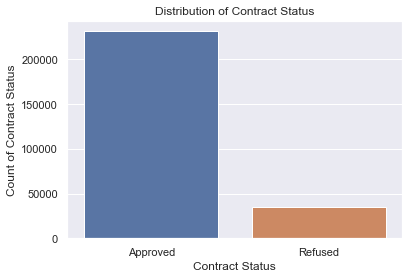

In [8]:
# Use matplotlib to virually shows that the differece between all types of application result
import matplotlib
sns.countplot(df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [9]:
# #since we are not yet interested in the reject reason, drop it for now
# #'NAME_SELLER_INDUSTRY'
# # we are not interested in how approved loan is paid back now, drop it
# df.drop('NAME_PAYMENT_TYPE', axis=1, inplace=True)

# df.drop(['SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE'
#         ,'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'], axis=1, inplace=True)

In [10]:
# check if the Canceled loan still exist
df['NAME_CONTRACT_STATUS'].value_counts()

Approved    231597
Refused      34784
Name: NAME_CONTRACT_STATUS, dtype: int64

In [11]:
# check the shape of the dataset again, obviously, the canceled data is dropped
df.shape

(266381, 28)

In [12]:
# convert text type data into numerical data
# df = pd.get_dummies(df, columns=['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT',
#                                  'NAME_CASH_LOAN_PURPOSE','NAME_TYPE_SUITE','NAME_CLIENT_TYPE',
#                                 'NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE',
#                                 'CHANNEL_TYPE','NAME_YIELD_GROUP','PRODUCT_COMBINATION','NFLAG_INSURED_ON_APPROVAL'], drop_first=True)

In [13]:
#Function to calculate meta-data to identify % of data is missing in each column
def meta_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [14]:
#calculating meta-data for application_data
app_meta_data=meta_data(df)
app_meta_data.head(20)

,Total,Percent,Unique,Data_Type
OWN_CAR_AGE,187570,70.414181,59,float64
NAME_TYPE_SUITE,106839,40.107590,7,object
AMT_DOWN_PAYMENT,87343,32.788750,13395,float64
CNT_CHILDREN,36798,13.814048,14,float64
FLAG_OWN_CAR,36798,13.814048,2,object
NAME_FAMILY_STATUS,36798,13.814048,5,object
NAME_EDUCATION_TYPE,36798,13.814048,5,object
NAME_INCOME_TYPE,36798,13.814048,7,object
AMT_INCOME_TOTAL,36798,13.814048,1629,float64
DAYS_EMPLOYED,36798,13.814048,11946,float64


In [15]:
#dropping columns with more than 57% missing values 
#Selected 57% because we don't want to drop EXT_SOURCE_1 which is an important variable
cols_to_keep=list(app_meta_data[(app_meta_data.Percent<57)].index)
application_data=df[cols_to_keep]
application_data.describe()

,AMT_DOWN_PAYMENT,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,AMT_GOODS_PRICE,CNT_PAYMENT,AMT_APPLICATION,HOUR_APPR_PROCESS_START,AMT_CREDIT
count,1.790380e+05,229583.000000,2.295830e+05,229583.000000,229583.000000,229583.0,229583.000000,229583.000000,2.538260e+05,256788.000000,2.663810e+05,266381.000000,2.663810e+05
mean,7.073634e+03,0.428477,1.671323e+05,62611.901896,-16004.834369,1.0,0.059756,2.167238,1.855394e+05,14.163388,1.767868e+05,12.723115,1.958441e+05
std,2.055966e+04,0.730701,2.657655e+05,140296.926035,4345.678978,0.0,0.237035,0.917496,2.649157e+05,12.356978,2.615638e+05,3.367469,2.840224e+05
min,-9.000000e-01,0.000000,2.565000e+04,-17912.000000,-25201.000000,1.0,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000e+00,0.000000,1.125000e+05,-2803.000000,-19619.000000,1.0,0.000000,2.000000,4.715550e+04,6.000000,4.500000e+04,10.000000,4.629600e+04
50%,1.885500e+03,0.000000,1.440000e+05,-1262.000000,-15687.000000,1.0,0.000000,2.000000,9.450000e+04,12.000000,9.000000e+04,13.000000,9.735300e+04
75%,8.440605e+03,1.000000,2.025000e+05,-316.000000,-12392.000000,1.0,0.000000,3.000000,1.914885e+05,18.000000,1.800000e+05,15.000000,2.037600e+05
max,2.025000e+06,19.000000,1.170000e+08,365243.000000,-7489.000000,1.0,1.000000,20.000000,6.905160e+06,84.000000,6.905160e+06,23.000000,6.905160e+06


In [16]:
#deal with missing AMT_ANNUITY values
df.isnull().sum()

NAME_CONTRACT_TYPE                 0
AMT_APPLICATION                    0
AMT_DOWN_PAYMENT               87343
AMT_GOODS_PRICE                12555
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
NAME_TYPE_SUITE               106839
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                     9593
CODE_GENDER                    36798
FLAG_OWN_CAR                   36798
FLAG_OWN_REALTY                36798
CNT_CHILDREN                   36798
AMT_INCOME_TOTAL               36798
NAME_INCOME_TYPE               36798
NAME_EDUCATION_TYPE            36798
NAME_FAMILY_STATUS             36798
NAME_HOUSING_TYPE              36798
DAYS_BIRTH                     36798
DAYS_EMPLOYED                  36798
OWN_CAR_AGE                   187570
FLAG_MOBIL                     36798
FLAG_EMAIL                     36798
CNT_FAM_MEMBERS                36798
NAME_CONTRACT_STATUS               0
A

In [17]:
df["CODE_GENDER"].value_counts()

F      151939
M       77641
XNA         3
Name: CODE_GENDER, dtype: int64

In [18]:
# get the average annuity of approved applications and refused applications
# average_approved_AMT_ANNUITY=(df[(df['NAME_CONTRACT_STATUS']=='Approved')])['AMT_ANNUITY'].mean()
# average_Refused_ANNUITY=(df[(df['NAME_CONTRACT_STATUS']=='Refused')])['AMT_ANNUITY'].mean()
# print("the average annuity of approved applications is ", average_approved_AMT_ANNUITY)
# print("the average annuity of refused applications is ", average_Refused_ANNUITY)

In [19]:
# #it seems like we have to fill something into the null values
# #some AMT_ANNUITY is empty, I will replace the the average AMT_ANNUITY based on its NAME_CONTRACT_STATUS

# df['AMT_ANNUITY'] = np.where(((df['AMT_ANNUITY'].isnull()==True) & (df['NAME_CONTRACT_STATUS'] == '1') ), average_approved_AMT_ANNUITY,df['AMT_ANNUITY'] )
# df['AMT_ANNUITY'] = np.where(((df['AMT_ANNUITY'].isnull()==True) & (df['NAME_CONTRACT_STATUS'] == '0') ), average_Refused_ANNUITY,df['AMT_ANNUITY'] )

In [20]:
df.head(30)
#AMT_ANNUITY data are all filled

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_SELLER_INDUSTRY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,NAME_CONTRACT_STATUS,AMT_CREDIT
0,Consumer loans,179055.000,0.000,179055.000,SATURDAY,9,NaN,New,Vehicles,Auto technology,...,Single / not married,House / apartment,-9461.0,-637.0,NaN,1.0,0.0,1.0,Approved,179055.000
1,Cash loans,900000.000,NaN,900000.000,FRIDAY,12,Unaccompanied,Repeater,XNA,XNA,...,Married,House / apartment,-16765.0,-1188.0,NaN,1.0,0.0,2.0,Approved,1035882.000
2,Consumer loans,24282.000,4860.000,24282.000,FRIDAY,5,Unaccompanied,New,Mobile,Connectivity,...,Single / not married,House / apartment,-19046.0,-225.0,26.0,1.0,0.0,1.0,Approved,20106.000
3,Revolving loans,270000.000,NaN,270000.000,THURSDAY,15,Unaccompanied,Repeater,XNA,XNA,...,Civil marriage,House / apartment,-19005.0,-3039.0,NaN,1.0,0.0,2.0,Approved,270000.000
4,Cash loans,247500.000,NaN,247500.000,MONDAY,11,NaN,Repeater,XNA,XNA,...,Single / not married,House / apartment,-19932.0,-3038.0,NaN,1.0,0.0,1.0,Approved,274288.500
5,Consumer loans,44455.500,4500.000,44455.500,MONDAY,13,NaN,New,Mobile,Connectivity,...,Married,House / apartment,-16941.0,-1588.0,NaN,1.0,0.0,2.0,Approved,39955.500
6,Consumer loans,98239.500,0.000,98239.500,SATURDAY,18,NaN,Repeater,Consumer Electronics,Consumer electronics,...,Married,House / apartment,-13778.0,-3130.0,17.0,1.0,0.0,3.0,Approved,98239.500
7,Consumer loans,135931.500,13594.500,135931.500,MONDAY,17,Children,New,Computers,Consumer electronics,...,Married,House / apartment,-20099.0,365243.0,NaN,1.0,0.0,2.0,Approved,134446.500
8,Cash loans,135000.000,NaN,135000.000,FRIDAY,13,Unaccompanied,Repeater,XNA,XNA,...,Single / not married,House / apartment,-14469.0,-2019.0,NaN,1.0,0.0,1.0,Approved,158508.000
9,Consumer loans,290250.000,58050.000,290250.000,SATURDAY,14,"Spouse, partner",Repeater,Clothing and Accessories,Clothing,...,Married,House / apartment,-13439.0,-2717.0,NaN,1.0,0.0,2.0,Approved,232200.000


In [21]:
# delete the row that miss AMT_CREDIT data
df = df.dropna( how='any',subset=['AMT_CREDIT'])
df.isnull().sum()

NAME_CONTRACT_TYPE                 0
AMT_APPLICATION                    0
AMT_DOWN_PAYMENT               87343
AMT_GOODS_PRICE                12555
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
NAME_TYPE_SUITE               106839
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                     9593
CODE_GENDER                    36798
FLAG_OWN_CAR                   36798
FLAG_OWN_REALTY                36798
CNT_CHILDREN                   36798
AMT_INCOME_TOTAL               36798
NAME_INCOME_TYPE               36798
NAME_EDUCATION_TYPE            36798
NAME_FAMILY_STATUS             36798
NAME_HOUSING_TYPE              36798
DAYS_BIRTH                     36798
DAYS_EMPLOYED                  36798
OWN_CAR_AGE                   187570
FLAG_MOBIL                     36798
FLAG_EMAIL                     36798
CNT_FAM_MEMBERS                36798
NAME_CONTRACT_STATUS               0
A

In [22]:
df['AMT_DOWN_PAYMENT'] = np.where(((df['AMT_DOWN_PAYMENT'].isnull()==True) ), 0,df['AMT_DOWN_PAYMENT'] )

In [23]:
df['OWN_CAR_AGE'] = np.where(((df['OWN_CAR_AGE'].isnull()==True) ), 0,df['OWN_CAR_AGE'] )

In [24]:
# df['OCCUPATION_TYPE'] = np.where(((df['OCCUPATION_TYPE'].isnull()==True) ), 'No Specified',df['OWN_CAR_AGE'] )

In [25]:
df['CNT_FAM_MEMBERS'] = np.where(((df['CNT_FAM_MEMBERS'].isnull()==True) ), 'No Specified',df['CNT_FAM_MEMBERS'] )

In [26]:
df.isnull().sum()

NAME_CONTRACT_TYPE                 0
AMT_APPLICATION                    0
AMT_DOWN_PAYMENT                   0
AMT_GOODS_PRICE                12555
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
NAME_TYPE_SUITE               106839
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                     9593
CODE_GENDER                    36798
FLAG_OWN_CAR                   36798
FLAG_OWN_REALTY                36798
CNT_CHILDREN                   36798
AMT_INCOME_TOTAL               36798
NAME_INCOME_TYPE               36798
NAME_EDUCATION_TYPE            36798
NAME_FAMILY_STATUS             36798
NAME_HOUSING_TYPE              36798
DAYS_BIRTH                     36798
DAYS_EMPLOYED                  36798
OWN_CAR_AGE                        0
FLAG_MOBIL                     36798
FLAG_EMAIL                     36798
CNT_FAM_MEMBERS                    0
NAME_CONTRACT_STATUS               0
A

In [27]:
df.shape

(266381, 28)

In [28]:
df = df.dropna( how='any',subset=['CODE_GENDER'])

In [29]:
df = df.dropna( how='any',subset=['AMT_GOODS_PRICE'])

In [30]:
df = df.dropna( how='any',subset=['CNT_PAYMENT'])

In [31]:
df.isnull().sum()

NAME_CONTRACT_TYPE                0
AMT_APPLICATION                   0
AMT_DOWN_PAYMENT                  0
AMT_GOODS_PRICE                   0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
NAME_TYPE_SUITE               77617
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               0
NAME_SELLER_INDUSTRY              0
CNT_PAYMENT                       0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
OWN_CAR_AGE                       0
FLAG_MOBIL                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   0
NAME_CONTRACT_STATUS              0
AMT_CREDIT                  

In [32]:
df['NAME_TYPE_SUITE'] = np.where(((df['NAME_TYPE_SUITE'].isnull()==True) ), 'No Specified',df['NAME_TYPE_SUITE'] )

In [33]:
# # make missing downpayments to zero
# #delete
# df['AMT_DOWN_PAYMENT'] = np.where(((df['AMT_DOWN_PAYMENT'].isnull()==True)), 0,df['AMT_DOWN_PAYMENT'])
# df.isnull().sum()

In [34]:
#client might not tell the goods' price, so just keep missing AMT_GOODS_PRICE values empty 

In [35]:
# #make missing RATE_DOWN_PAYMENT to zero since the AMT_DOWN_PAYMENT is zero
# df['AMT_DOWN_PAYMENT'] = np.where(((df['RATE_DOWN_PAYMENT'].isnull()==True)), 0,df['RATE_DOWN_PAYMENT'])
# df.isnull().sum()
# df=df.drop(['AMT_DOWN_PAYMENT','AMT_DOWN_PAYMENT'],1)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


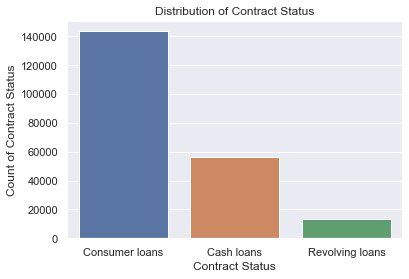

In [36]:
# how many types of loan types?
sns.countplot(df.NAME_CONTRACT_TYPE)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [37]:
# delete rows which has missing NAME_TYPE_SUITE and NFLAG_INSURED_ON_APPROVAL
# missing NAME_TYPE_SUITE means the borrower does not tell Who accompanied client when 
# applying for the loan application, and missing NFLAG_INSURED_ON_APPROVAL means borrower does
# not say about weather he requested insurance during the loan application
df.dropna(subset=['NAME_TYPE_SUITE','AMT_GOODS_PRICE'],inplace=True)
df.isnull().sum()

NAME_CONTRACT_TYPE            0
AMT_APPLICATION               0
AMT_DOWN_PAYMENT              0
AMT_GOODS_PRICE               0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
NAME_TYPE_SUITE               0
NAME_CLIENT_TYPE              0
NAME_GOODS_CATEGORY           0
NAME_SELLER_INDUSTRY          0
CNT_PAYMENT                   0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
OWN_CAR_AGE                   0
FLAG_MOBIL                    0
FLAG_EMAIL                    0
CNT_FAM_MEMBERS               0
NAME_CONTRACT_STATUS          0
AMT_CREDIT                    0
dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


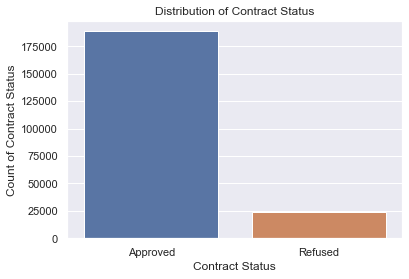

In [38]:
sns.countplot(df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()


In [39]:
# get the total amount of approved and refused applications
approved=df[df.NAME_CONTRACT_STATUS=='Approved']
refused=df[df.NAME_CONTRACT_STATUS=='Refused']

In [40]:
#get the percentage
percentage_approved=(len(approved)*100)/len(df)
percentage_refused=(len(refused)*100)/len(df)
print("The Percentage of people whose loans have been Approved is:",round(percentage_approved,3),"%")
print("The Percentage of people whose loans have been Refused is:",round(percentage_refused,3),"%")

The Percentage of people whose loans have been Approved is: 88.542 %
The Percentage of people whose loans have been Refused is: 11.458 %


In [41]:
#build a function to disaply the numbers of value in a column sorted by refused and approved 
#applications
def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,30))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    plt.show()

In [42]:
df.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_SELLER_INDUSTRY',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'CNT_FAM_MEMBERS', 'NAME_CONTRACT_STATUS'],
      dtype='object')

In [43]:
# plot_charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)
# #we can see that most applications got refused because those borrows just ask for cash
# #and most approved application is for mortgage and mobile

In [44]:
# plot_charts('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)
# #we can see low interest rate application is likely to get refused.

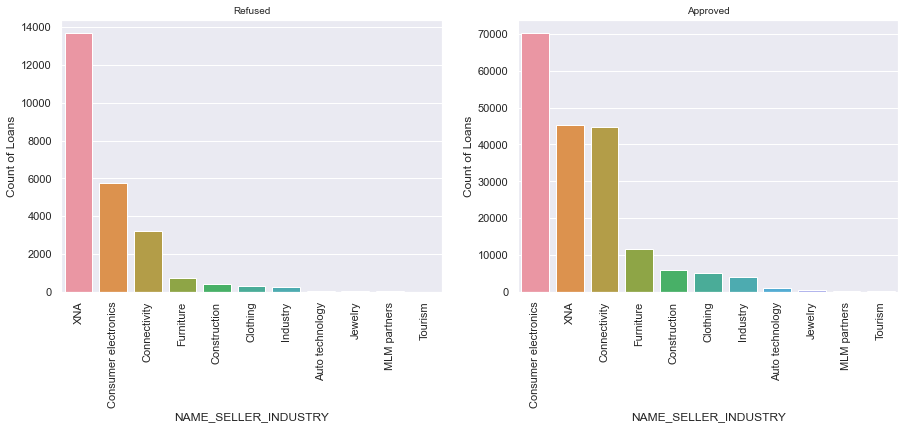

In [45]:
plot_charts('NAME_SELLER_INDUSTRY', label_rotation=True,horizontal_layout=True)

In [46]:
# plot_charts('NAME_CASH_LOAN_PURPOSE', label_rotation=True,horizontal_layout=True)

In [47]:
#sns.pairplot(df, hue='NAME_CONTRACT_STATUS');

In [48]:
# # #drop interest rate column since most of them are missing
# # df = df.drop('RATE_INTEREST_PRIMARY', 1)
# # df = df.drop('RATE_INTEREST_PRIVILEGED', 1)
# # df = df.drop('SK_ID_PREV', 1)
# df = df.drop('SK_ID_CURR', 1)
# df.isnull().sum()

In [49]:
# df=df.drop(['NFLAG_LAST_APPL_IN_DAY','NFLAG_LAST_APPL_IN_DAY'],1)

In [50]:
# df=df.drop(['PRODUCT_COMBINATION','PRODUCT_COMBINATION'],1)

In [51]:
# df=df.drop(['NAME_CASH_LOAN_PURPOSE','NAME_CASH_LOAN_PURPOSE'],1)

In [52]:
# df=df.drop(['NAME_PAYMENT_TYPE','NAME_PAYMENT_TYPE'],1)

In [53]:
# df=df.drop(['REGION_POPULATION_RELATIVE','REGION_POPULATION_RELATIVE'],1)

In [54]:
# df=df.drop(['DAYS_REGISTRATION','DAYS_REGISTRATION'],1)

In [55]:
# df=df.drop(['AMT_ANNUITY','AMT_ANNUITY'],1)

In [56]:
# df=df.drop(['AMT_CREDIT','AMT_CREDIT'],1)

In [57]:
# df=df.drop(['OCCUPATION_TYPE','OCCUPATION_TYPE'],1)

In [58]:
# df=df.drop(['FLAG_WORK_PHONE','FLAG_WORK_PHONE'],1)

In [59]:
# df.isnull().sum()

In [60]:
# df['NAME_YIELD_GROUP'].value_counts()

In [61]:
df['CNT_PAYMENT'].value_counts()
x=0;
for i in df['CNT_PAYMENT']:
    if i>x:
        x=i
print(x)

84.0


In [62]:
# df.head()

In [63]:
df['CODE_GENDER'] = np.where(((df['CODE_GENDER']=='M') ), '1','0')

In [64]:
df['CODE_GENDER'].value_counts()

0    141307
1     71734
Name: CODE_GENDER, dtype: int64

In [65]:
df['FLAG_OWN_CAR'] = np.where(((df['FLAG_OWN_CAR']=='Y') ), '1','0')

In [66]:
df['FLAG_OWN_CAR'].value_counts()

0    140418
1     72623
Name: FLAG_OWN_CAR, dtype: int64

In [67]:
df['FLAG_OWN_REALTY'] = np.where(((df['FLAG_OWN_REALTY']=='Y') ), '1','0')

In [68]:
df['FLAG_OWN_REALTY'].value_counts()

1    150035
0     63006
Name: FLAG_OWN_REALTY, dtype: int64

In [69]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 111768
Commercial associate     47546
Pensioner                38447
State servant            15253
Unemployed                  15
Student                     10
Maternity leave              2
Name: NAME_INCOME_TYPE, dtype: int64

In [70]:
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    153994
Higher education                  49137
Incomplete higher                  7033
Lower secondary                    2754
Academic degree                     123
Name: NAME_EDUCATION_TYPE, dtype: int64

In [71]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 136482
Single / not married     30414
Civil marriage           20912
Separated                13787
Widow                    11446
Name: NAME_FAMILY_STATUS, dtype: int64

In [72]:
df['NAME_HOUSING_TYPE'].value_counts()

House / apartment      188823
With parents            10262
Municipal apartment      7939
Rented apartment         3428
Office apartment         1848
Co-op apartment           741
Name: NAME_HOUSING_TYPE, dtype: int64

In [73]:
df = pd.get_dummies(df, columns=['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE',
                                'NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_SELLER_INDUSTRY','NAME_INCOME_TYPE',
                                 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'
                                ], drop_first=True)

In [74]:
for col_name in df.columns: 
    print(f"'{col_name}',")

'AMT_APPLICATION',
'AMT_DOWN_PAYMENT',
'AMT_GOODS_PRICE',
'HOUR_APPR_PROCESS_START',
'CNT_PAYMENT',
'CODE_GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'FLAG_MOBIL',
'FLAG_EMAIL',
'CNT_FAM_MEMBERS',
'NAME_CONTRACT_STATUS',
'AMT_CREDIT',
'NAME_CONTRACT_TYPE_Consumer loans',
'NAME_CONTRACT_TYPE_Revolving loans',
'WEEKDAY_APPR_PROCESS_START_MONDAY',
'WEEKDAY_APPR_PROCESS_START_SATURDAY',
'WEEKDAY_APPR_PROCESS_START_SUNDAY',
'WEEKDAY_APPR_PROCESS_START_THURSDAY',
'WEEKDAY_APPR_PROCESS_START_TUESDAY',
'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
'NAME_TYPE_SUITE_Family',
'NAME_TYPE_SUITE_Group of people',
'NAME_TYPE_SUITE_No Specified',
'NAME_TYPE_SUITE_Other_A',
'NAME_TYPE_SUITE_Other_B',
'NAME_TYPE_SUITE_Spouse, partner',
'NAME_TYPE_SUITE_Unaccompanied',
'NAME_CLIENT_TYPE_Refreshed',
'NAME_CLIENT_TYPE_Repeater',
'NAME_CLIENT_TYPE_XNA',
'NAME_GOODS_CATEGORY_Animals',
'NAME_GOODS_CATEGORY_Audio/Video',
'NAME_GOODS_CA

In [75]:
#prepare datas for build
selected_features = ['AMT_APPLICATION',
'AMT_DOWN_PAYMENT',
'AMT_GOODS_PRICE',
'HOUR_APPR_PROCESS_START',
'CNT_PAYMENT',
'CODE_GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'FLAG_MOBIL',
'FLAG_EMAIL',
'CNT_FAM_MEMBERS',
'NAME_CONTRACT_TYPE_Consumer loans',
'NAME_CONTRACT_TYPE_Revolving loans',
'WEEKDAY_APPR_PROCESS_START_MONDAY',
'WEEKDAY_APPR_PROCESS_START_SATURDAY',
'WEEKDAY_APPR_PROCESS_START_SUNDAY',
'WEEKDAY_APPR_PROCESS_START_THURSDAY',
'WEEKDAY_APPR_PROCESS_START_TUESDAY',
'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
'NAME_TYPE_SUITE_Family',
'NAME_TYPE_SUITE_Group of people',
'NAME_TYPE_SUITE_No Specified',
'NAME_TYPE_SUITE_Other_A',
'NAME_TYPE_SUITE_Other_B',
'NAME_TYPE_SUITE_Spouse, partner',
'NAME_TYPE_SUITE_Unaccompanied',
'NAME_CLIENT_TYPE_Refreshed',
'NAME_CLIENT_TYPE_Repeater',
'NAME_CLIENT_TYPE_XNA',
'NAME_GOODS_CATEGORY_Animals',
'NAME_GOODS_CATEGORY_Audio/Video',
'NAME_GOODS_CATEGORY_Auto Accessories',
'NAME_GOODS_CATEGORY_Clothing and Accessories',
'NAME_GOODS_CATEGORY_Computers',
'NAME_GOODS_CATEGORY_Construction Materials',
'NAME_GOODS_CATEGORY_Consumer Electronics',
'NAME_GOODS_CATEGORY_Direct Sales',
'NAME_GOODS_CATEGORY_Education',
'NAME_GOODS_CATEGORY_Fitness',
'NAME_GOODS_CATEGORY_Furniture',
'NAME_GOODS_CATEGORY_Gardening',
'NAME_GOODS_CATEGORY_Homewares',
'NAME_GOODS_CATEGORY_Insurance',
'NAME_GOODS_CATEGORY_Jewelry',
'NAME_GOODS_CATEGORY_Medical Supplies',
'NAME_GOODS_CATEGORY_Medicine',
'NAME_GOODS_CATEGORY_Mobile',
'NAME_GOODS_CATEGORY_Office Appliances',
'NAME_GOODS_CATEGORY_Other',
'NAME_GOODS_CATEGORY_Photo / Cinema Equipment',
'NAME_GOODS_CATEGORY_Sport and Leisure',
'NAME_GOODS_CATEGORY_Tourism',
'NAME_GOODS_CATEGORY_Vehicles',
'NAME_GOODS_CATEGORY_Weapon',
'NAME_GOODS_CATEGORY_XNA',
'NAME_SELLER_INDUSTRY_Clothing',
'NAME_SELLER_INDUSTRY_Connectivity',
'NAME_SELLER_INDUSTRY_Construction',
'NAME_SELLER_INDUSTRY_Consumer electronics',
'NAME_SELLER_INDUSTRY_Furniture',
'NAME_SELLER_INDUSTRY_Industry',
'NAME_SELLER_INDUSTRY_Jewelry',
'NAME_SELLER_INDUSTRY_MLM partners',
'NAME_SELLER_INDUSTRY_Tourism',
'NAME_SELLER_INDUSTRY_XNA',
'NAME_INCOME_TYPE_Maternity leave',
'NAME_INCOME_TYPE_Pensioner',
'NAME_INCOME_TYPE_State servant',
'NAME_INCOME_TYPE_Student',
'NAME_INCOME_TYPE_Unemployed',
'NAME_INCOME_TYPE_Working',
'NAME_EDUCATION_TYPE_Higher education',
'NAME_EDUCATION_TYPE_Incomplete higher',
'NAME_EDUCATION_TYPE_Lower secondary',
'NAME_EDUCATION_TYPE_Secondary / secondary special',
'NAME_FAMILY_STATUS_Married',
'NAME_FAMILY_STATUS_Separated',
'NAME_FAMILY_STATUS_Single / not married',
'NAME_FAMILY_STATUS_Widow',
'NAME_HOUSING_TYPE_House / apartment',
'NAME_HOUSING_TYPE_Municipal apartment',
'NAME_HOUSING_TYPE_Office apartment',
'NAME_HOUSING_TYPE_Rented apartment',
'NAME_HOUSING_TYPE_With parents']

X = df[selected_features]
y = df['NAME_CONTRACT_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)

Lenght of our Training data: (170432, 89) 
Length of our Testing data: (42609,)


In [76]:
df['NAME_CONTRACT_STATUS'].value_counts()

Approved    188630
Refused      24411
Name: NAME_CONTRACT_STATUS, dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213041 entries, 0 to 262330
Data columns (total 91 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   AMT_APPLICATION                                    213041 non-null  float64
 1   AMT_DOWN_PAYMENT                                   213041 non-null  float64
 2   AMT_GOODS_PRICE                                    213041 non-null  float64
 3   HOUR_APPR_PROCESS_START                            213041 non-null  int64  
 4   CNT_PAYMENT                                        213041 non-null  float64
 5   CODE_GENDER                                        213041 non-null  object 
 6   FLAG_OWN_CAR                                       213041 non-null  object 
 7   FLAG_OWN_REALTY                                    213041 non-null  object 
 8   CNT_CHILDREN                                       213041 non-null  float6

In [78]:
y_train.value_counts()

Approved    150834
Refused      19598
Name: NAME_CONTRACT_STATUS, dtype: int64

In [79]:
y_train.isna().sum()


0

In [80]:
pd.set_option("display.max_columns", None)
df.head(10)

,AMT_APPLICATION,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,CNT_PAYMENT,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,NAME_CONTRACT_STATUS,AMT_CREDIT,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_No Specified,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_CLIENT_TYPE_XNA,NAME_GOODS_CATEGORY_Animals,NAME_GOODS_CATEGORY_Audio/Video,NAME_GOODS_CATEGORY_Auto Accessories,NAME_GOODS_CATEGORY_Clothing and Accessories,NAME_GOODS_CATEGORY_Computers,NAME_GOODS_CATEGORY_Construction Materials,NAME_GOODS_CATEGORY_Consumer Electronics,NAME_GOODS_CATEGORY_Direct Sales,NAME_GOODS_CATEGORY_Education,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Furniture,NAME_GOODS_CATEGORY_Gardening,NAME_GOODS_CATEGORY_Homewares,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Jewelry,NAME_GOODS_CATEGORY_Medical Supplies,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA,NAME_SELLER_INDUSTRY_Clothing,NAME_SELLER_INDUSTRY_Connectivity,NAME_SELLER_INDUSTRY_Construction,NAME_SELLER_INDUSTRY_Consumer electronics,NAME_SELLER_INDUSTRY_Furniture,NAME_SELLER_INDUSTRY_Industry,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_MLM partners,NAME_SELLER_INDUSTRY_Tourism,NAME_SELLER_INDUSTRY_XNA,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,179055.0,0.0,179055.0,9,24.0,1,0,1,0.0,202500.0,-9461.0,-637.0,0.0,1.0,0.0,1.0,Approved,179055.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,900000.0,0.0,900000.0,12,12.0,0,0,0,0.0,270000.0,-16765.0,-1188.0,0.0,1.0,0.0,2.0,Approved,1035882.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,24282.0,4860.0,24282.0,5,4.0,1,1,1,0.0,67500.0,-19046.0,-225.0,26.0,1.0,0.0,1.0,Approved,20106.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
3,270000.0,0.0,270000.0,15,0.0,0,0,1,0.0,135000.0,-19005.0,-3039.0,0.0,1.0,0.0,2.0,Approved,270000.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,247500.0,0.0,247500.0,11,24.0,1,0,1,0.0,121500.0,-19932.0,-3038.0,0.0,1.0,0.0,1.0,Approved,274288.5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
5,44455.5,4500.0,44455.5,13,6.0,1,0,1,0.0,99000.0,-16941.0,-1588.0,0.0,1.0,0.0,2.0,Approved,39955.5,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [81]:
from sklearn.tree import DecisionTreeClassifier 


model = DecisionTreeClassifier(max_depth=9)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred,pos_label='Approved')
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred, pos_label='Approved')
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred,pos_label='Approved')
print('F1 Score: %f' % f1)


# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# # Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# # Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)

print('AUC Score: %f' % auc)

Accuracy Score: 0.894928
Precision Score: 0.901308
Recall Score: 0.989946
F1 Score: 0.943550
AUC Score: 0.807343


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


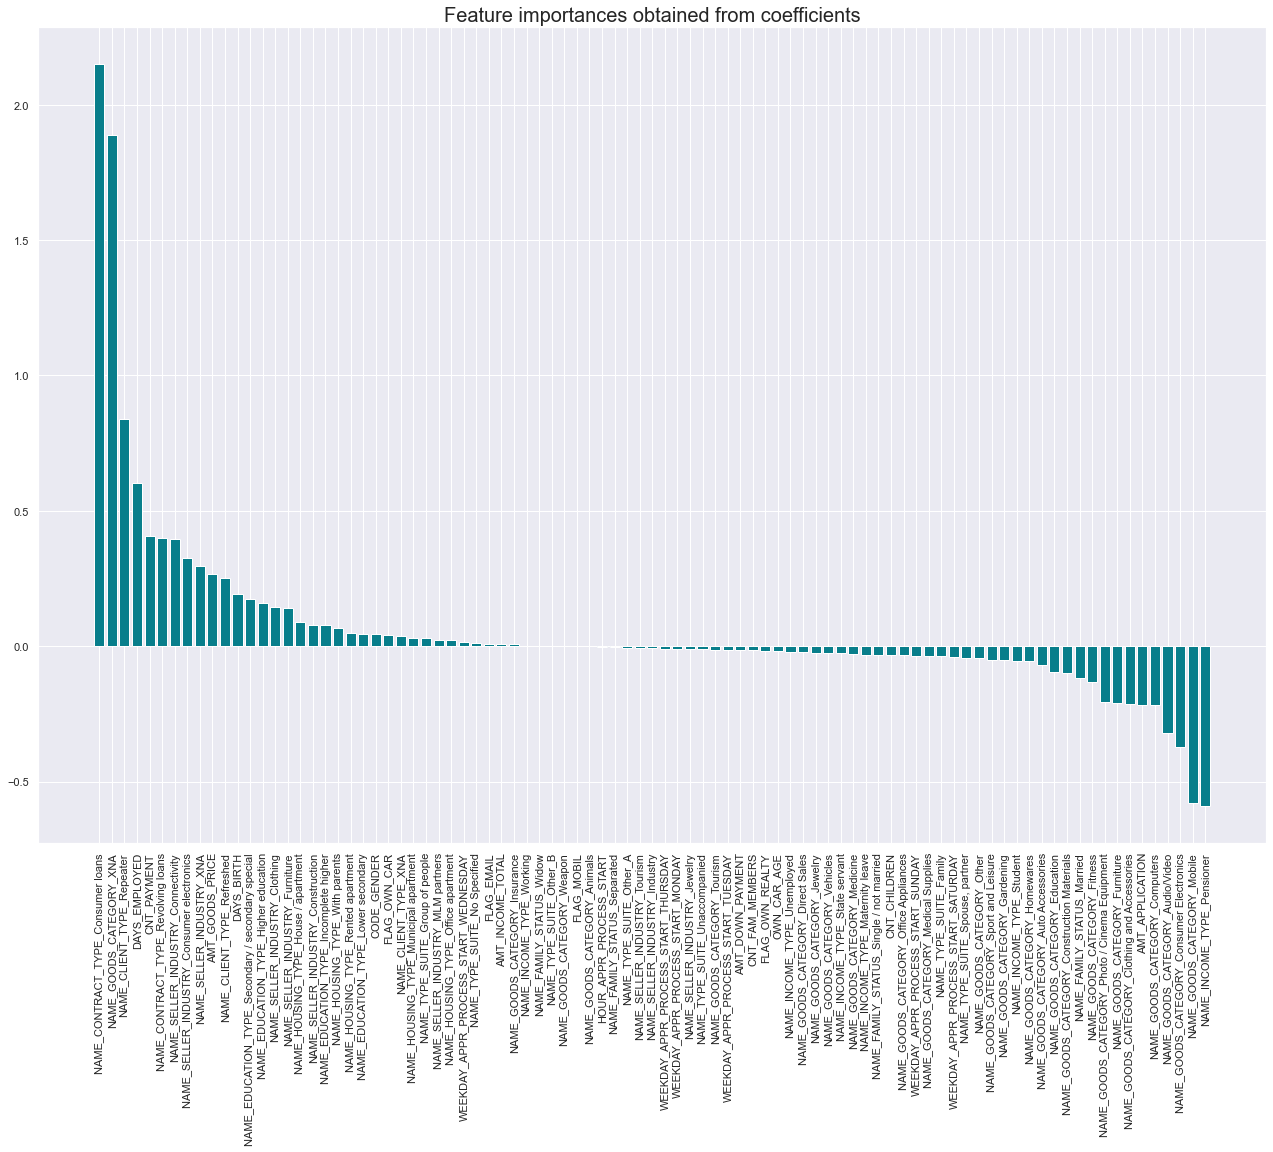

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
fig, ax = plt.subplots(figsize=(22,15))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Now lets look at our feature importances
my_dict = {'feature_importance': model.feature_importances_,
           'feature':selected_features }
feature_imp = pd.DataFrame.from_dict( my_dict ).sort_values('feature_importance', ascending=False)
feature_imp
# 

In [86]:
# Initialize an empty Random Forest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred, pos_label='Approved')
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred, pos_label='Approved')
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label='Approved')
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)



Accuracy Score: 0.896454
Precision Score: 0.901868
Recall Score: 0.991110
F1 Score: 0.944386
AUC Score: 0.805061


In [87]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred, pos_label='Approved')
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred, pos_label='Approved')
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label='Approved')
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.872633
Precision Score: 0.893047
Recall Score: 0.972934
F1 Score: 0.931280
AUC Score: 0.613865


In [89]:
df.isnull().sum()

AMT_APPLICATION                          0
AMT_DOWN_PAYMENT                         0
AMT_GOODS_PRICE                          0
HOUR_APPR_PROCESS_START                  0
CNT_PAYMENT                              0
                                        ..
NAME_HOUSING_TYPE_House / apartment      0
NAME_HOUSING_TYPE_Municipal apartment    0
NAME_HOUSING_TYPE_Office apartment       0
NAME_HOUSING_TYPE_Rented apartment       0
NAME_HOUSING_TYPE_With parents           0
Length: 91, dtype: int64

In [90]:

# params = {
#     'n_estimators' : [5, 10, 50, 100],
#     'criterion' : ['gini', 'entropy'],
#     'max_depth': [5, 10, 20], 
#     'min_samples_split': [2, 10, 100],
#     'max_features': [2, 4, 'auto']
# }

# grid_search_cv = GridSearchCV( 
#     estimator=RandomForestClassifier(), 
#     param_grid=params,
#     scoring='f1', )


# # Now, with one easy command, fit all combination of trees. 
# grid_search_cv.fit(X_train, y_train)


# # Print the best parameters it found
# print(grid_search_cv.best_params_)


# # This command gives you model that has the highest f1-score. 
# model = grid_search_cv.best_estimator_

# # Now lets evaluate our model
# y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
# print("Accuracy Score: %f" % accuracy)

# precision = precision_score(y_true=y_test, y_pred=y_pred, pos_label='1')
# print("Precision Score: %f" % precision)

# recall = recall_score(y_true=y_test, y_pred=y_pred, pos_label='1')
# print("Recall Score: %f" % recall)

# f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label='1')
# print('F1 Score: %f' % f1)

# # Calculate predicted probabilities, keep only probability for when class = 1
# y_pred_proba = model.predict_proba(X_test)[:,1]
# auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
# print('AUC Score: %f' % auc)



In [91]:
# predicting the loan amount range
# will have delete the refused data, and delete the application_result column
# and treat loan_amount as our new y data
df.head(30)

,AMT_APPLICATION,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,CNT_PAYMENT,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,NAME_CONTRACT_STATUS,AMT_CREDIT,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_No Specified,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_CLIENT_TYPE_XNA,NAME_GOODS_CATEGORY_Animals,NAME_GOODS_CATEGORY_Audio/Video,NAME_GOODS_CATEGORY_Auto Accessories,NAME_GOODS_CATEGORY_Clothing and Accessories,NAME_GOODS_CATEGORY_Computers,NAME_GOODS_CATEGORY_Construction Materials,NAME_GOODS_CATEGORY_Consumer Electronics,NAME_GOODS_CATEGORY_Direct Sales,NAME_GOODS_CATEGORY_Education,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Furniture,NAME_GOODS_CATEGORY_Gardening,NAME_GOODS_CATEGORY_Homewares,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Jewelry,NAME_GOODS_CATEGORY_Medical Supplies,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA,NAME_SELLER_INDUSTRY_Clothing,NAME_SELLER_INDUSTRY_Connectivity,NAME_SELLER_INDUSTRY_Construction,NAME_SELLER_INDUSTRY_Consumer electronics,NAME_SELLER_INDUSTRY_Furniture,NAME_SELLER_INDUSTRY_Industry,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_MLM partners,NAME_SELLER_INDUSTRY_Tourism,NAME_SELLER_INDUSTRY_XNA,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,179055.000,0.000,179055.000,9,24.0,1,0,1,0.0,202500.0,-9461.0,-637.0,0.0,1.0,0.0,1.0,Approved,179055.000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,900000.000,0.000,900000.000,12,12.0,0,0,0,0.0,270000.0,-16765.0,-1188.0,0.0,1.0,0.0,2.0,Approved,1035882.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,24282.000,4860.000,24282.000,5,4.0,1,1,1,0.0,67500.0,-19046.0,-225.0,26.0,1.0,0.0,1.0,Approved,20106.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
3,270000.000,0.000,270000.000,15,0.0,0,0,1,0.0,135000.0,-19005.0,-3039.0,0.0,1.0,0.0,2.0,Approved,270000.000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,247500.000,0.000,247500.000,11,24.0,1,0,1,0.0,121500.0,-19932.0,-3038.0,0.0,1.0,0.0,1.0,Approved,274288.500,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
5,44455.500,4500.000,44455.500,13,6.0,1,0,1,0.0,99000.0,-16941.0,-1588.0,0.0,1.0,0.0,2.0,Approved,39955.500,1,0,1,0,0,0,0,0,

In [92]:
# drop refused data
df.drop(df[df['NAME_CONTRACT_STATUS']=='Refused'].index, inplace = True)

In [93]:
# delete NAME_CONTRACT_STATUS column
df = df.drop('NAME_CONTRACT_STATUS', 1)

In [94]:
pd.set_option('display.max_columns', None)
df.head(100)

,AMT_APPLICATION,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,CNT_PAYMENT,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,AMT_CREDIT,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_No Specified,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_CLIENT_TYPE_XNA,NAME_GOODS_CATEGORY_Animals,NAME_GOODS_CATEGORY_Audio/Video,NAME_GOODS_CATEGORY_Auto Accessories,NAME_GOODS_CATEGORY_Clothing and Accessories,NAME_GOODS_CATEGORY_Computers,NAME_GOODS_CATEGORY_Construction Materials,NAME_GOODS_CATEGORY_Consumer Electronics,NAME_GOODS_CATEGORY_Direct Sales,NAME_GOODS_CATEGORY_Education,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Furniture,NAME_GOODS_CATEGORY_Gardening,NAME_GOODS_CATEGORY_Homewares,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Jewelry,NAME_GOODS_CATEGORY_Medical Supplies,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA,NAME_SELLER_INDUSTRY_Clothing,NAME_SELLER_INDUSTRY_Connectivity,NAME_SELLER_INDUSTRY_Construction,NAME_SELLER_INDUSTRY_Consumer electronics,NAME_SELLER_INDUSTRY_Furniture,NAME_SELLER_INDUSTRY_Industry,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_MLM partners,NAME_SELLER_INDUSTRY_Tourism,NAME_SELLER_INDUSTRY_XNA,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,179055.0,0.0,179055.0,9,24.0,1,0,1,0.0,202500.0,-9461.0,-637.0,0.0,1.0,0.0,1.0,179055.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,900000.0,0.0,900000.0,12,12.0,0,0,0,0.0,270000.0,-16765.0,-1188.0,0.0,1.0,0.0,2.0,1035882.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,24282.0,4860.0,24282.0,5,4.0,1,1,1,0.0,67500.0,-19046.0,-225.0,26.0,1.0,0.0,1.0,20106.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
3,270000.0,0.0,270000.0,15,0.0,0,0,1,0.0,135000.0,-19005.0,-3039.0,0.0,1.0,0.0,2.0,270000.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,247500.0,0.0,247500.0,11,24.0,1,0,1,0.0,121500.0,-19932.0,-3038.0,0.0,1.0,0.0,1.0,274288.5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [95]:
df['AMT_CREDIT'].value_counts()

45000.0     4252
225000.0    1314
135000.0    1274
90000.0      946
450000.0     909
            ... 
196591.5       1
976711.5       1
105777.0       1
310410.0       1
65470.5        1
Name: AMT_CREDIT, Length: 46345, dtype: int64

In [96]:
for col_name in df.columns: 
    print(f"'{col_name}',")

'AMT_APPLICATION',
'AMT_DOWN_PAYMENT',
'AMT_GOODS_PRICE',
'HOUR_APPR_PROCESS_START',
'CNT_PAYMENT',
'CODE_GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'FLAG_MOBIL',
'FLAG_EMAIL',
'CNT_FAM_MEMBERS',
'AMT_CREDIT',
'NAME_CONTRACT_TYPE_Consumer loans',
'NAME_CONTRACT_TYPE_Revolving loans',
'WEEKDAY_APPR_PROCESS_START_MONDAY',
'WEEKDAY_APPR_PROCESS_START_SATURDAY',
'WEEKDAY_APPR_PROCESS_START_SUNDAY',
'WEEKDAY_APPR_PROCESS_START_THURSDAY',
'WEEKDAY_APPR_PROCESS_START_TUESDAY',
'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
'NAME_TYPE_SUITE_Family',
'NAME_TYPE_SUITE_Group of people',
'NAME_TYPE_SUITE_No Specified',
'NAME_TYPE_SUITE_Other_A',
'NAME_TYPE_SUITE_Other_B',
'NAME_TYPE_SUITE_Spouse, partner',
'NAME_TYPE_SUITE_Unaccompanied',
'NAME_CLIENT_TYPE_Refreshed',
'NAME_CLIENT_TYPE_Repeater',
'NAME_CLIENT_TYPE_XNA',
'NAME_GOODS_CATEGORY_Animals',
'NAME_GOODS_CATEGORY_Audio/Video',
'NAME_GOODS_CATEGORY_Auto Accessories'

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
df = pd.read_csv('Project_Dataset/Application_Data.csv')
df['NAME_CONTRACT_STATUS']=df['NAME_CONTRACT_STATUS'].replace('Unused offer', 'Approved')

# df.drop(df[df['NAME_CONTRACT_STATUS'] =='Canceled'].index, inplace = True)

df = df.dropna( how='any',subset=['AMT_CREDIT'])

df = df.dropna( how='any',subset=['CODE_GENDER'])

df = df.dropna( how='any',subset=['AMT_GOODS_PRICE'])

df = df.dropna( how='any',subset=['CNT_PAYMENT'])

df = df.dropna( how='any',subset=['CODE_GENDER'])

df['AMT_DOWN_PAYMENT'] = np.where(((df['AMT_DOWN_PAYMENT'].isnull()==True) ), 0,df['AMT_DOWN_PAYMENT'] )

df['OWN_CAR_AGE'] = np.where(((df['OWN_CAR_AGE'].isnull()==True) ), 0,df['OWN_CAR_AGE'] )

df['CNT_FAM_MEMBERS'] = np.where(((df['CNT_FAM_MEMBERS'].isnull()==True) ), 0,df['CNT_FAM_MEMBERS'] )

df['NAME_TYPE_SUITE'] = np.where(((df['NAME_TYPE_SUITE'].isnull()==True) ), 'No Specified',df['NAME_TYPE_SUITE'] )

df['CODE_GENDER'] = np.where(((df['CODE_GENDER']=='M') ), '1','0')

df['FLAG_OWN_CAR'] = np.where(((df['FLAG_OWN_CAR']=='Y') ), '1','0')

df['FLAG_OWN_REALTY'] = np.where(((df['FLAG_OWN_REALTY']=='Y') ), '1','0')

df.drop(['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','NAME_TYPE_SUITE','NAME_CLIENT_TYPE',
        'NAME_GOODS_CATEGORY','NAME_SELLER_INDUSTRY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',], axis=1, inplace=True)
#prepare datas for build



original_cols = df.columns

target_cols = ['AMT_APPLICATION','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE',
               'CNT_PAYMENT','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED']

z_score_cols = []

# Loop through our target columns
for col in target_cols:
    # Make the new column name the same as the original but with 'z_score' added to it
    new_col_name = col + "_zscore"
    
    # Set the new column equal to the score
    df[new_col_name] = stats.stats.zscore( df[col] )
    
    # Set the z-score to its absolute value of the for easier filtering
    df[new_col_name] = abs( df[new_col_name] )
    
    # Append the new column name our our z_score_cols list for easier access for later.
    z_score_cols.append(new_col_name)


condition = df[z_score_cols] < 3
print(df.shape)

# # Say TRUE only if all of the rows are True, else return False
condition = condition.all(axis=1)

print('Before removal of outliers', df.shape)

df = df[condition]

print('After removal of outliers', df.shape)



features = ['AMT_APPLICATION','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED']
target = ['AMT_CREDIT']

X = df[features].values


# ISOLATE JUST OUR TARGET DATA, THIS IS WHAT WE ARE TRYING TO PREDICT
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


# GET THE COEFFICIENT VALUES FROM THE MODEL
coefficient_values = model.coef_

# MAKE A DATA FRAME OUT OF THE VALUES AND THEIR COLUMN NAMES
df_coefficients = pd.DataFrame(coefficient_values, columns=features).T

# RENAME THE COLUMN FROM 0 TO COEFFICIENT
df_coefficients.columns = ['coefficient']

# DISPLAY THE DATA FRAME
df_coefficients

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11,12,13,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(214184, 24)
Before removal of outliers (214184, 24)
After removal of outliers (201801, 24)
R-Squared Score: 0.9817470649332356
Mean Absolute Error: 10360.89375625982


,coefficient
AMT_APPLICATION,-0.011982
AMT_DOWN_PAYMENT,-1.301504
AMT_GOODS_PRICE,1.093212
AMT_INCOME_TOTAL,-0.006818
DAYS_BIRTH,0.007510
DAYS_EMPLOYED,-0.006445


<AxesSubplot:xlabel='AMT_APPLICATION', ylabel='AMT_CREDIT'>

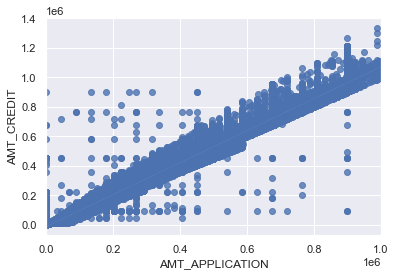

In [142]:
plt.figure(figsize=(8,5))
sns.regplot(x='AMT_APPLICATION', y='AMT_CREDIT', data=df, x_jitter=0.4)

<AxesSubplot:xlabel='AMT_DOWN_PAYMENT', ylabel='AMT_CREDIT'>

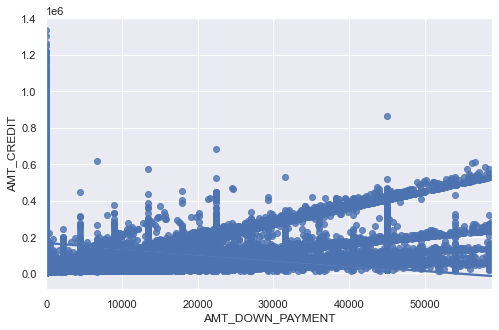

In [144]:
plt.figure(figsize=(8,5))
sns.regplot(x='AMT_DOWN_PAYMENT', y='AMT_CREDIT', data=df, x_jitter=0.4)

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>

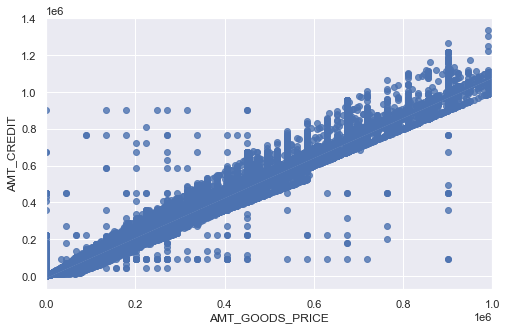

In [145]:
plt.figure(figsize=(8,5))
sns.regplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data=df, x_jitter=0.4)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

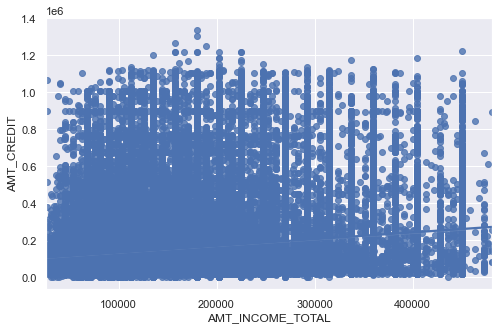

In [146]:
plt.figure(figsize=(8,5))
sns.regplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=df, x_jitter=0.4)

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='AMT_CREDIT'>

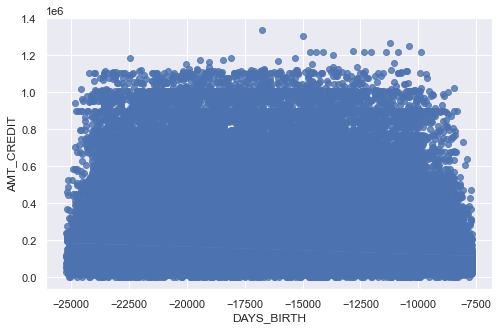

In [147]:
plt.figure(figsize=(8,5))
sns.regplot(x='DAYS_BIRTH', y='AMT_CREDIT', data=df, x_jitter=0.4)

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='AMT_CREDIT'>

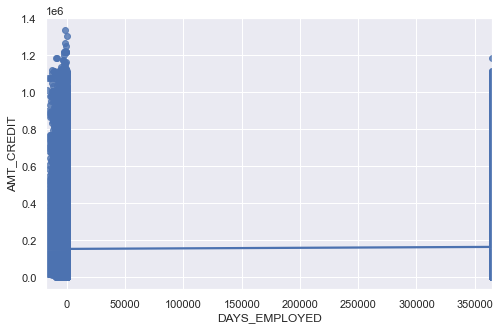

In [148]:
plt.figure(figsize=(8,5))
sns.regplot(x='DAYS_EMPLOYED', y='AMT_CREDIT', data=df, x_jitter=0.4)

In [149]:
y_pred = model.predict(X_test)
# CREATE A PANDAS DATAFRAME USING OUR PREDICTIONS 
df_preds = pd.DataFrame(y_pred, columns=['predictions'])

# CREATE A COLUMN OF THE ACTUAL VALUES FROM OUR TEST SET
df_preds['actual'] = y_test

# CALCULATE THE ABSOLUTE ERROR OF THE PREDICTIONS TO OUR ACTUAL 
df_preds['abs_error'] = abs(df_preds['predictions'] - df_preds['actual'])

# DISPLAY OUR DATAFRAME
df_preds.head(10)

,predictions,actual,abs_error
0,74718.767859,71955.0,2763.767859
1,43885.487552,51876.0,7990.512448
2,19616.697409,21226.5,1609.802591
3,297825.189687,274500.0,23325.189687
4,118460.131843,109665.0,8795.131843
5,320782.661530,316602.0,4180.661530
6,38000.780684,37264.5,736.280684
7,489049.243681,533160.0,44110.756319
8,488867.278646,481185.0,7682.278646
9,24344.178381,21600.0,2744.178381


In [150]:
#Random Forest Regression
features = ['AMT_APPLICATION','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED']
target = ['AMT_CREDIT']
# ISOLATE THE DATA TO JUST OUR FEATURES
X = df[features].values


# ISOLATE JUST OUR TARGET DATA, THIS IS WHAT WE ARE TRYING TO PREDICT
y = df[target].values


# SPLIT OUR DATA INTO TRAINING AND TESTING SETS, 
# 80% GOING INTO OUR TESTING, AND HOLDING OUT 20% FOR OUR TESTING
# KEEP THE SAME random_state AS OUR FIRST MODEL
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [151]:


from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)



<ipython-input-151-4784c2d979a1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [152]:


r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)


# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)



R-Squared Score: 0.9822639181587042
Mean Absolute Error: 10211.352721914189


In [153]:
model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

<ipython-input-153-ea4fbbe3c087>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


R-Squared Score: 0.9838234901278531
Mean Absolute Error: 9757.054725219654


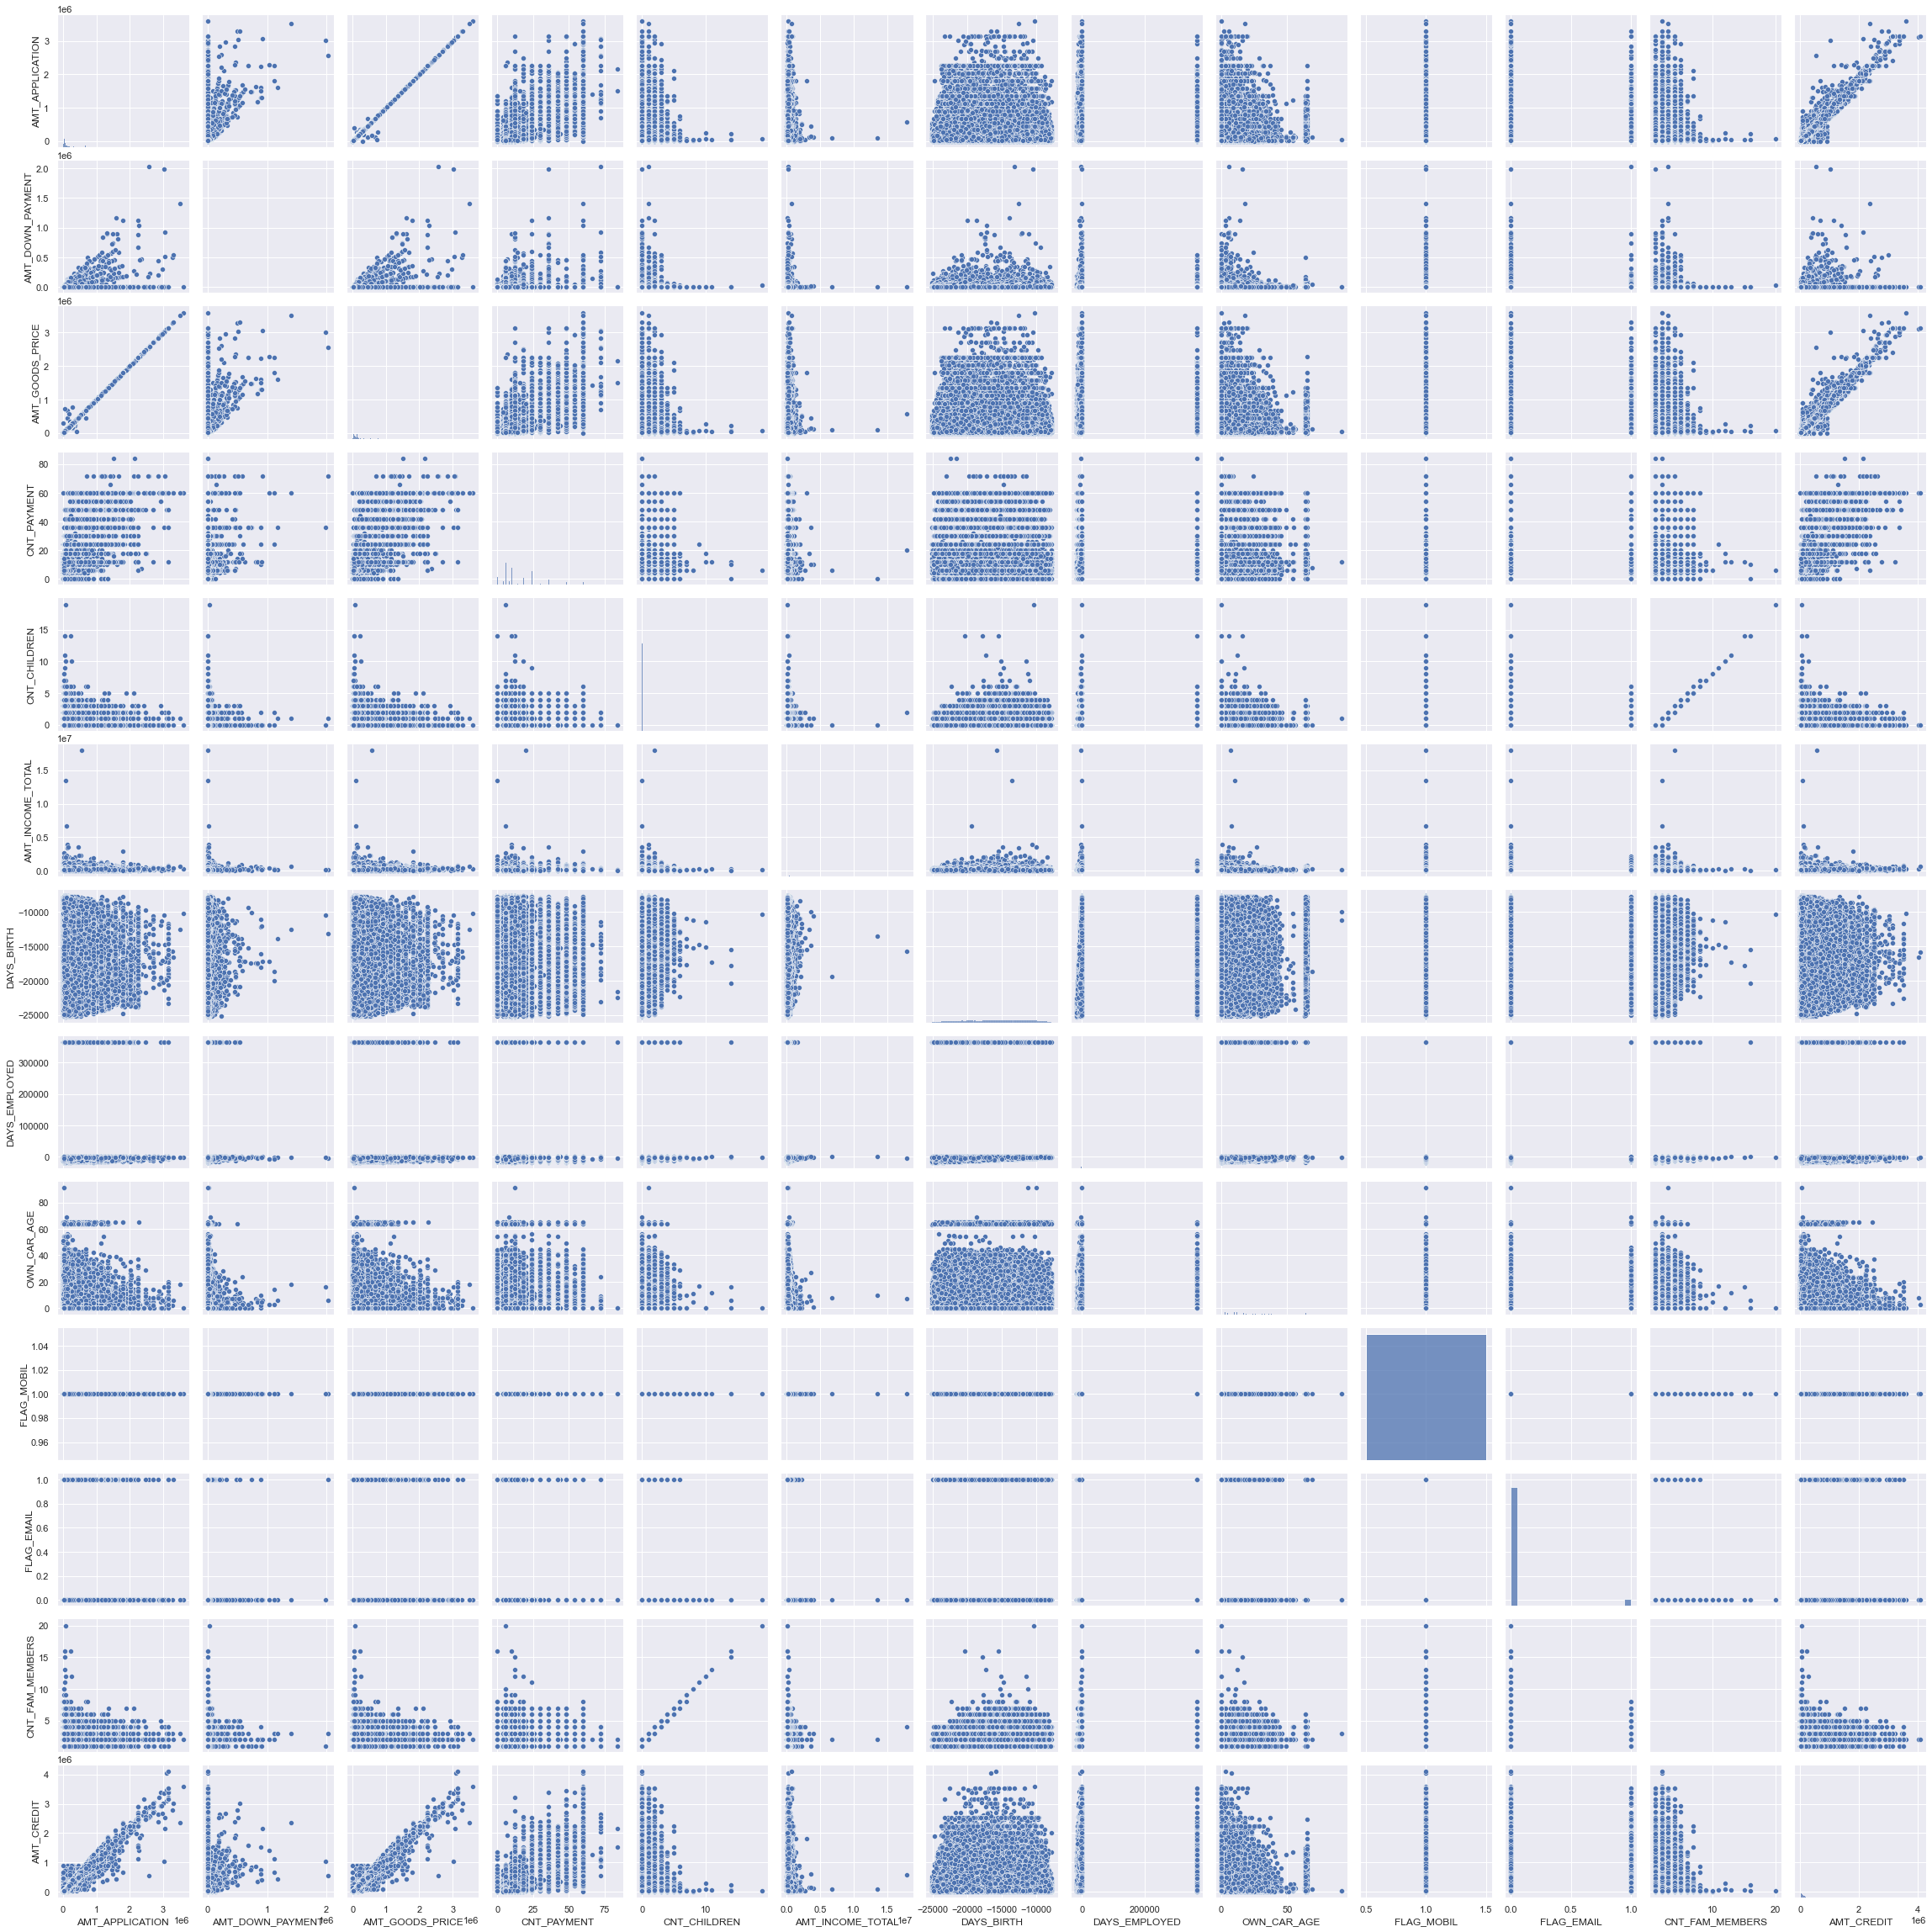

In [109]:
sns.pairplot(data=df)

In [112]:

# for feature in all_features:
#     sns.relplot(data = df, y = feature, x = 'AMT_CREDIT', kind='line', height=5, aspect=1)
target

In [ ]:
# import scipy.stats as stats

# original_cols = df.columns

# target_cols = ['AMT_ANNUITY',
# 'AMT_APPLICATION',
# 'AMT_GOODS_PRICE',
# 'HOUR_APPR_PROCESS_START',
# 'NFLAG_LAST_APPL_IN_DAY',
# 'DAYS_DECISION',
# 'NAME_CONTRACT_TYPE_Consumer loans',
# 'NAME_CONTRACT_TYPE_Revolving loans']

# z_score_cols = []

# # Loop through our target columns
# for col in target_cols:
#     # Make the new column name the same as the original but with 'z_score' added to it
#     new_col_name = col + "_zscore"
    
#     # Set the new column equal to the score
#     df[new_col_name] = stats.stats.zscore( df[col] )
    
#     # Set the z-score to its absolute value of the for easier filtering
#     df[new_col_name] = abs( df[new_col_name] )
    
#     # Append the new column name our our z_score_cols list for easier access for later.
#     z_score_cols.append(new_col_name)


# condition = df[z_score_cols] < 3
# print(df.shape)

# # # Say TRUE only if all of the rows are True, else return False
# condition = condition.all(axis=1)

# print('Before removal of outliers', df.shape)

# df = df[condition]

# print('After removal of outliers', df.shape)



In [ ]:
# df = df[original_cols]

In [ ]:
import pandas as pd
import pickle
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('Project_Dataset/Application_Data.csv')

df['NAME_CONTRACT_STATUS']=df['NAME_CONTRACT_STATUS'].replace('Unused offer', 'Approved')
df.drop(df[df['NAME_CONTRACT_STATUS'] =='Canceled'].index, inplace = True)

df = df.dropna( how='any',subset=['AMT_CREDIT'])

df = df.dropna( how='any',subset=['CODE_GENDER'])

df = df.dropna( how='any',subset=['AMT_GOODS_PRICE'])

df = df.dropna( how='any',subset=['CNT_PAYMENT'])

df = df.dropna( how='any',subset=['CODE_GENDER'])

df['AMT_DOWN_PAYMENT'] = np.where(((df['AMT_DOWN_PAYMENT'].isnull()==True) ), 0,df['AMT_DOWN_PAYMENT'] )

df['OWN_CAR_AGE'] = np.where(((df['OWN_CAR_AGE'].isnull()==True) ), 0,df['OWN_CAR_AGE'] )

df['CNT_FAM_MEMBERS'] = np.where(((df['CNT_FAM_MEMBERS'].isnull()==True) ), 0,df['CNT_FAM_MEMBERS'] )

df['NAME_TYPE_SUITE'] = np.where(((df['NAME_TYPE_SUITE'].isnull()==True) ), 'No Specified',df['NAME_TYPE_SUITE'] )

df['CODE_GENDER'] = np.where(((df['CODE_GENDER']=='M') ), '1','0')

df['FLAG_OWN_CAR'] = np.where(((df['FLAG_OWN_CAR']=='Y') ), '1','0')

df['FLAG_OWN_REALTY'] = np.where(((df['FLAG_OWN_REALTY']=='Y') ), '1','0')

df = pd.get_dummies(df, columns=['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE',
                                'NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_SELLER_INDUSTRY','NAME_INCOME_TYPE',
                                 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'
                                ], drop_first=True)

#prepare datas for build
selected_features = ['AMT_APPLICATION',
'AMT_DOWN_PAYMENT',
'AMT_GOODS_PRICE',
'HOUR_APPR_PROCESS_START',
'CNT_PAYMENT',
'CODE_GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'FLAG_MOBIL',
'FLAG_EMAIL',
'CNT_FAM_MEMBERS',
'NAME_CONTRACT_TYPE_Consumer loans',
'NAME_CONTRACT_TYPE_Revolving loans',
'WEEKDAY_APPR_PROCESS_START_MONDAY',
'WEEKDAY_APPR_PROCESS_START_SATURDAY',
'WEEKDAY_APPR_PROCESS_START_SUNDAY',
'WEEKDAY_APPR_PROCESS_START_THURSDAY',
'WEEKDAY_APPR_PROCESS_START_TUESDAY',
'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
'NAME_TYPE_SUITE_Family',
'NAME_TYPE_SUITE_Group of people',
'NAME_TYPE_SUITE_No Specified',
'NAME_TYPE_SUITE_Other_A',
'NAME_TYPE_SUITE_Other_B',
'NAME_TYPE_SUITE_Spouse, partner',
'NAME_TYPE_SUITE_Unaccompanied',
'NAME_CLIENT_TYPE_Refreshed',
'NAME_CLIENT_TYPE_Repeater',
'NAME_CLIENT_TYPE_XNA',
'NAME_GOODS_CATEGORY_Animals',
'NAME_GOODS_CATEGORY_Audio/Video',
'NAME_GOODS_CATEGORY_Auto Accessories',
'NAME_GOODS_CATEGORY_Clothing and Accessories',
'NAME_GOODS_CATEGORY_Computers',
'NAME_GOODS_CATEGORY_Construction Materials',
'NAME_GOODS_CATEGORY_Consumer Electronics',
'NAME_GOODS_CATEGORY_Direct Sales',
'NAME_GOODS_CATEGORY_Education',
'NAME_GOODS_CATEGORY_Fitness',
'NAME_GOODS_CATEGORY_Furniture',
'NAME_GOODS_CATEGORY_Gardening',
'NAME_GOODS_CATEGORY_Homewares',
'NAME_GOODS_CATEGORY_Insurance',
'NAME_GOODS_CATEGORY_Jewelry',
'NAME_GOODS_CATEGORY_Medical Supplies',
'NAME_GOODS_CATEGORY_Medicine',
'NAME_GOODS_CATEGORY_Mobile',
'NAME_GOODS_CATEGORY_Office Appliances',
'NAME_GOODS_CATEGORY_Other',
'NAME_GOODS_CATEGORY_Photo / Cinema Equipment',
'NAME_GOODS_CATEGORY_Sport and Leisure',
'NAME_GOODS_CATEGORY_Tourism',
'NAME_GOODS_CATEGORY_Vehicles',
'NAME_GOODS_CATEGORY_Weapon',
'NAME_GOODS_CATEGORY_XNA',
'NAME_SELLER_INDUSTRY_Clothing',
'NAME_SELLER_INDUSTRY_Connectivity',
'NAME_SELLER_INDUSTRY_Construction',
'NAME_SELLER_INDUSTRY_Consumer electronics',
'NAME_SELLER_INDUSTRY_Furniture',
'NAME_SELLER_INDUSTRY_Industry',
'NAME_SELLER_INDUSTRY_Jewelry',
'NAME_SELLER_INDUSTRY_MLM partners',
'NAME_SELLER_INDUSTRY_Tourism',
'NAME_SELLER_INDUSTRY_XNA',
'NAME_INCOME_TYPE_Maternity leave',
'NAME_INCOME_TYPE_Pensioner',
'NAME_INCOME_TYPE_State servant',
'NAME_INCOME_TYPE_Student',
'NAME_INCOME_TYPE_Unemployed',
'NAME_INCOME_TYPE_Working',
'NAME_EDUCATION_TYPE_Higher education',
'NAME_EDUCATION_TYPE_Incomplete higher',
'NAME_EDUCATION_TYPE_Lower secondary',
'NAME_EDUCATION_TYPE_Secondary / secondary special',
'NAME_FAMILY_STATUS_Married',
'NAME_FAMILY_STATUS_Separated',
'NAME_FAMILY_STATUS_Single / not married',
'NAME_FAMILY_STATUS_Widow',
'NAME_HOUSING_TYPE_House / apartment',
'NAME_HOUSING_TYPE_Municipal apartment',
'NAME_HOUSING_TYPE_Office apartment',
'NAME_HOUSING_TYPE_Rented apartment',
'NAME_HOUSING_TYPE_With parents']


X = df[selected_features]
y = df['NAME_CONTRACT_STATUS']


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)
model = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
model.fit(X_train, y_train)
y_pred_gini = model.predict(X_test)
pickle.dump(model, open('C:/Users/JIN XIN/DataScience_project/models/loanPrediction.pkl', 'wb') )




